## Problem Set #[4]
MACS 30150, Dr. Evans

Zhou Xing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import chi2
from scipy.stats import lognorm
import pandas as pd

## Question 1(a)

In [2]:
pts = np.loadtxt('./data/incomes.txt')

(40000, 150000)

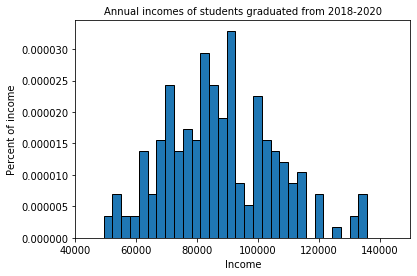

In [5]:
num_bins = 30
count, bins, ignored = plt.hist(pts, num_bins, density=True, edgecolor="k")
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([40000, 150000])  # This gives the xmin and xmax to be plotted"

## Question 1(b)

Log-likelihood:  -2385.856997808558


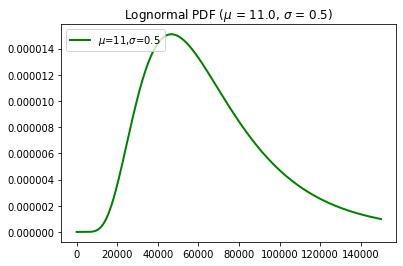

In [13]:
def log_normal_pdf(xvals, mu, sigma):
    return 1/(xvals*sigma * np.sqrt(2 * np.pi))*np.e \
            **(-(np.log(xvals) - mu)**2 / (2 * sigma**2))

# Plot smooth line with distribution 1
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1 ),
         linewidth=2, color='g', label='$\mu$=11,$\sigma$=0.5')
plt.title("Lognormal PDF ($\mu$ = 11.0, $\sigma$ = 0.5)")
plt.legend(loc='upper left')

def log_lik_log_normal(xvals, mu, sigma):
    pdf_vals = log_normal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

print('Log-likelihood: ', log_lik_log_normal(pts, mu_1, sig_1))


In [11]:
# Define the lognormal likelihood function for the lognormal distribution
def log_lik_trunc_lognormal(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = log_normal_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

The value of the likelihood function is  -2241.7193013573587


## Question 1(c)

In [22]:
def crit(params, *args):
    mu, sigma = params
    incomes = args
    pdf_vals = lognorm.pdf(incomes, s=abs(sigma), scale=np.exp(mu))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = pts
results = opt.minimize(crit, params_init, args=mle_args)
mu, sigma = results.x
print('The optimized result is mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
print('The value of the likelihood function is ', fval)

The optimized result is mu = 11.36, sigma = 0.21
The value of the likelihood function is  -2241.7193013573587


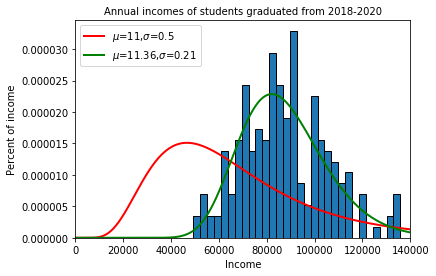

In [25]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',density=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([0, 140000])  # This gives the xmin and xmax to be plotted"

# Plot smooth line with distribution 1
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1 ),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

# Plot smooth line with MLE distribution
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_2 = mu
sig_2 = sigma
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_2, sig_2 ),
         linewidth=2, color='g', label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')

In [27]:
# Calculate the variance-covariance matrix
Hess = results.hess_inv
print("The variance-covariance matrix is\n {}.".format(Hess))

The variance-covariance matrix is
 [[2.18365059e-04 7.09688808e-07]
 [7.09688808e-07 1.08153259e-04]].


## (d)

In [28]:
mu_new, sig_new = np.array([11, 0.5])
log_lik_h0 = log_lik_log_normal(pts, mu_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_log_normal(pts, mu, sigma)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)



hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193013573583
likelihood ratio value 288.2753929023993
chi squared of H0 with 2 degrees of freedom p-value =  0.0


 **Since the p-value is 0.0, we can reject the $H_{0}$ at any level of significance and conclude that the data in `income.txt` is very unlikely from the distribution in part(b).**

## (e)

In [29]:
prob1 = 1 - lognorm.cdf(100000, s=sigma, scale=np.exp(mu))
prob2 = lognorm.cdf(75000, s=sigma, scale=np.exp(mu))
print('Probability of earning more than $100,000 is {:.3f}'.format(prob1))
print('Probability of earning less than $75,000 is {:.3f}'.format(prob2))

Probability of earning more than $100,000 is 0.230
Probability of earning less than $75,000 is 0.260


## Question 2

In [30]:
df=pd.read_csv("./data/sick.txt").astype('float64')

In [31]:
def norm_pdf(xvals, sig):
    pdf_vals = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(xvals)**2 / (2*sig**2))                  
    return pdf_vals

def log_lik_norm(y, x1, x2, x3, beta0, beta1, beta2, beta3, sig):
    epsilon = y-beta0-beta1*x1-beta2*x2-beta3*x3
    pdf_vals = norm_pdf(epsilon, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit2(params,*args):
    beta0, beta1, beta2, beta3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, beta0, beta1, \
                               beta2, beta3, sig)
    neg_log_lik_val = -log_lik_val 
    return neg_log_lik_val

In [33]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.25,0.01,0.40,-0.01,0.5)
y, x1, x2, x3=df['sick'],df['age'], df['children'], df['avgtemp_winter']
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit2, params_init,(y, x1, x2, x3))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
print('beta 0=', b0_MLE)
print('beta 1=', b1_MLE)
print('beta 2=', b2_MLE)
print('beta 3=', b3_MLE)
print('sigma=', sig_MLE)
print("value of the log likelihood function:",-results.fun)
print("The variance-covariance matrix is\n {}.".format(results.hess_inv))

/Users/zhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/zhou/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/zhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/zhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/Users/zhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/zhou/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


beta 0= 0.2516463835944188
beta 1= 0.012933350042594651
beta 2= 0.4005020483277568
beta 3= -0.009991673034304855
sigma= 0.0030176821759746917
value of the log likelihood function: 876.8650462886983
The variance-covariance matrix is
 [[ 1.31964803e-08 -1.21634282e-09  4.05703405e-10  8.24257575e-10
  -2.88692518e-11]
 [-1.21634282e-09  3.25199238e-09 -9.60401263e-10 -2.33068347e-09
  -1.49658690e-09]
 [ 4.05703405e-10 -9.60401263e-10  3.53489649e-10  6.48349172e-10
   4.39365659e-10]
 [ 8.24257575e-10 -2.33068347e-09  6.48349172e-10  1.70845268e-09
   1.02442303e-09]
 [-2.88692518e-11 -1.49658690e-09  4.39365659e-10  1.02442303e-09
   1.55897474e-09]].


## (b)

In [34]:
b0_new, b1_new, b2_new, b3_new, sig_new = np.array([1,0,0,0,0.1])
log_lik_h0 = log_lik_norm(y, x1, x2, x3, b0_new, \
                          b1_new, b2_new, b3_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', -results.fun)
LR_val = 2 * ((-results.fun)-log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650462886983
likelihood ratio value 6261.131468661646
chi squared of H0 with 2 degrees of freedom p-value =  0.0


**Since the p-value is 0.0, we can reject the $H_{0}$ at any level of significance and conclude that it is very unlikely that age, number of children, and average winter temperature have no effect on the number of sick days.**